Import and define all functions:

In [ ]:
%matplotlib notebook
%matplotlib notebook
from matplotlib import rc
rc('animation', html='jshtml')

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
import json

def create_example(n=20,num_frames=50,fname=None) :
    '''
    Creates an animation example for the other functions to use.
    
    Parameters
    ----------
    n : int, optional
        Generates nxn grid. The default is 20.
    num_frames : int, optional
        How many frames of animation? The default is 50.
    fname : string or None, optional
        If not None, this is a filename for the JSON output which can be read
            by load_json_file(). 
        If None, this function returns a (num_frames,n,n)-size numpy array
            which can be used directly by display_animation().
        The default is None.

    Returns
    -------
     a (num_frames,n,n)-size numpy array which can be used directly by 
     display_animation().
    '''
    seed = np.random.randint(0,2,(n,n))
    # seed[0,:] = np.eye(n)
    transform = np.eye(n)
    transform[1:n,:n-1] += np.eye(n-1)
    transform *= 0.5
    to_dump = [seed.tolist()]*5
    for i in range(num_frames) :
        new_mat = transform@np.array(to_dump[-1])
        to_dump.append(new_mat.tolist())
    if fname is not None :
        with open(fname, 'w') as outfile:
            json.dump(to_dump,outfile)
    return np.array(to_dump)

def load_json_file(fname='json_data.json') :
    '''
    This script should be in the same directory as the JSON
    file to be read.

    Parameters
    ----------
    fname : string, optional
        Filename of the JSON input file. The file should have been created by 
        python using json.dump(list_of_arrays), where list_of_arrays is a list
        of NxN numpy arrays which have been converted to lists using the numpy
        .tolist() function.
        The default is 'json_data.json'.

    Returns
    -------
    numpy array with dimensions (T,N,N), where T is the number of 
    animation frames.

    '''
    with open(fname) as json_file :
        data = json.load(json_file)
    return np.array(data)

def display_animation(data,frame_ms=33,fignum=13,saveFile='animation.gif') :
    '''
    Creates animation

    Parameters
    ----------
    data : numpy array with shape (T,N,N)
        T is number of frames, N is number of pixels on each side of 
        square grid.
    frame_ms : int, optional
        Number of milliseconds to draw each frame. The default is 33.
    fignum : int, optional
        The desired pyplot figure to plot in. The default is 13 for luck.

    Returns
    -------
    animation object.
    NOTE: This object must be kept in memory as long as you wish to view the 
    animation; otherwise garbage collection will remove it. This means the 
    function return needs to be assigned to a variable.
    
    Example:
    anim = display_animation(load_json_file())

    '''
    fig = plt.figure(fignum)
    myplot = plt.matshow(data[0],fignum=fignum)
    num_frames = data.shape[0]

    def update(j) :
        myplot.set_data(data[j])
        return [myplot]

    anim = FuncAnimation(fig,
                         update, 
                         frames = num_frames,
                         interval=frame_ms,
                         repeat=True,
                         save_count=num_frames)
    if saveFile is not None :
        anim.save(saveFile)
    return anim

## first I'll call create_example to build the animation data:

In [ ]:
data = create_example(n=20,num_frames=50)

## then I'll pass the data to `display_animation` to actually do the animation.
Note that `saveFile=None`, which means it won't create a gif of the animation

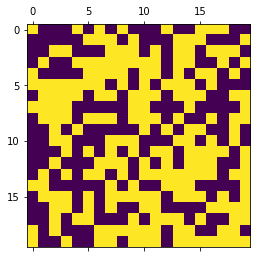

In [ ]:
anim = display_animation(data,frame_ms=30,fignum=13,saveFile=None)
anim

## Another alternative lets you create your animation data, save it to disk, then load it back for animation later.
## First we have to create the data and save it as json:  

In [ ]:
create_example(n=20,num_frames=50,fname='anim_data.json');

## now we can load it back into Python:

In [ ]:
data_from_json = load_json_file('anim_data.json')

## now we can pass it back to `display_animation` just like before.
## this time, I'll create the gif but NOT display the animation in Python (by suppressing the function's output with):


MovieWriter stderr:
[gif @ 0x55ee9cfbc600] GIF muxer supports only a single video GIF stream.
Could not write header for output file #0 (incorrect codec parameters ?): Invalid argument
Error initializing output stream 0:0 -- 



CalledProcessError: ignored

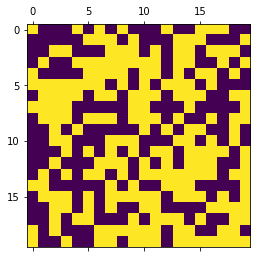

In [ ]:
display_animation(data,frame_ms=30,fignum=14,saveFile='anim.gif');